In [5]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from matplotlib import pyplot as plt

X, y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
scaler= MinMaxScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s= scaler.transform(X_test)

lin_reg=LinearRegression()
lin_reg.fit(X_train_s,y_train)
print ('Linear Regression')
print ('R2 train score =', lin_reg.score(X_train_s, y_train))
print ('R2 test score =', lin_reg.score(X_test_s, y_test))

ridge_reg=Ridge()
ridge_reg.fit(X_train_s,y_train)
print ('Ridge')
print ('R2 train score =', ridge_reg.score(X_train_s, y_train))
print ('R2 test score =', ridge_reg.score(X_test_s, y_test))

lasso_reg=Lasso()
lasso_reg.fit(X_train_s,y_train)
print ('Lasso')
print ('R2 train score =', lasso_reg.score(X_train_s, y_train))
print ('R2 test score =', lasso_reg.score(X_test_s, y_test))

poly= PolynomialFeatures(degree=2,include_bias=False) 
X_train_poly= poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_lin_reg = LinearRegression().fit (X_train_poly,y_train)
regressor = poly_lin_reg
print ('Polynomial + Linear Regression')
print ('R2 train score =', regressor.score(X_train_poly, y_train))
print ('R2 test score =', regressor.score(X_test_poly, y_test))



Linear Regression
R2 train score = 0.5227529629539156
R2 test score = 0.4864799673803216
Ridge
R2 train score = 0.5169919027951779
R2 test score = 0.49309478117055827
Lasso
R2 train score = 0.4951799517661577
R2 test score = 0.4902391391599895
Polynomial + Linear Regression
R2 train score = 0.6016116191645984
R2 test score = 0.44611290069898135


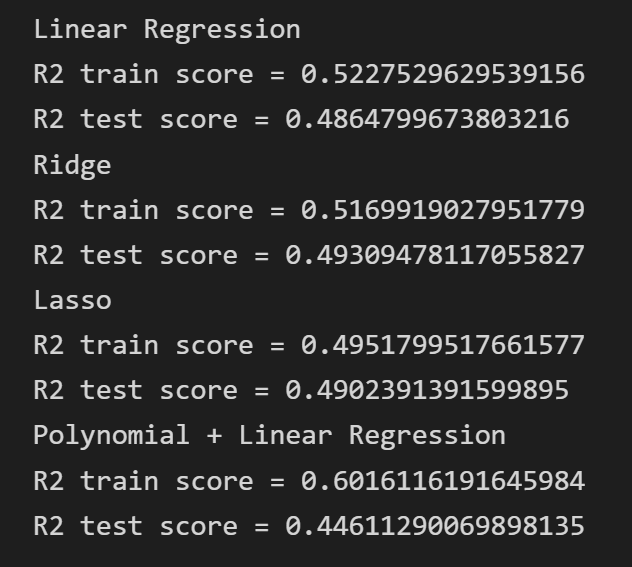
